In [1]:
import sys
!{sys.executable} -m pip install palmerpenguins
from palmerpenguins import load_penguins
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Loading and preprocessing data

In [2]:
data = load_penguins()
data.dropna(inplace=True)
target = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
data['species'] = data['species'].map(target)
target1 = {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}
data['island'] = data['island'].map(target1)
target2 = {'male': 0, 'female': 1}
data['sex'] = data['sex'].map(target2)

In [ ]:
Showing correlations and covariances

In [3]:
print(data.cov())
print(data.corr())

                      species      island  bill_length_mm  bill_depth_mm  \
species              0.791599   -0.005536        3.554534      -1.297134   
island              -0.005536    0.459803        0.786288       0.253224   
bill_length_mm       3.554534    0.786288       29.906333      -2.462091   
bill_depth_mm       -1.297134    0.253224       -2.462091       3.877888   
flipper_length_mm   10.608759   -1.546655       50.058195     -15.947248   
body_mass_g        537.622110 -110.275109     2595.623304    -748.456122   
sex                 -0.004884   -0.001981       -0.942201      -0.367478   
year                 0.003419   -0.015648        0.145183      -0.077133   

                   flipper_length_mm    body_mass_g         sex       year  
species                    10.608759     537.622110   -0.004884   0.003419  
island                     -1.546655    -110.275109   -0.001981  -0.015648  
bill_length_mm             50.058195    2595.623304   -0.942201   0.145183  
bill_de

In [ ]:
Dividing the dataset into features and targets

In [4]:
X = data.drop(['species'], axis=1)
y = data['species']

In [ ]:
Dividing the dataset into test and train

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=43)

In [ ]:
Training and predicting data with kNearestNeighbours, DecisionTree and Ensemble Classifiers.
Calculating their accuracy scores

In [6]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.835820895522388


In [7]:
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
y_pred2 = dc.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.9701492537313433


In [8]:
vot = VotingClassifier(estimators=[('knn', knn), ('dc', dc)], voting='hard')
vot.fit(X_train,y_train)
votpred = vot.predict(X_test)
print(accuracy_score(y_test,votpred))

0.9104477611940298


In [ ]:
Plot showing number of penguins in different groups

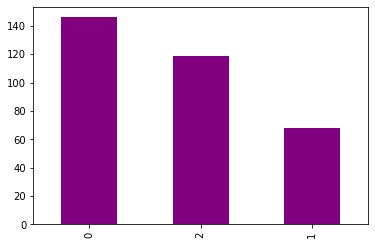

In [9]:
data['species'].value_counts().plot(kind='bar',color='purple')
plt.show()

In [ ]:
Plot showing correlations between certain characteristics by species

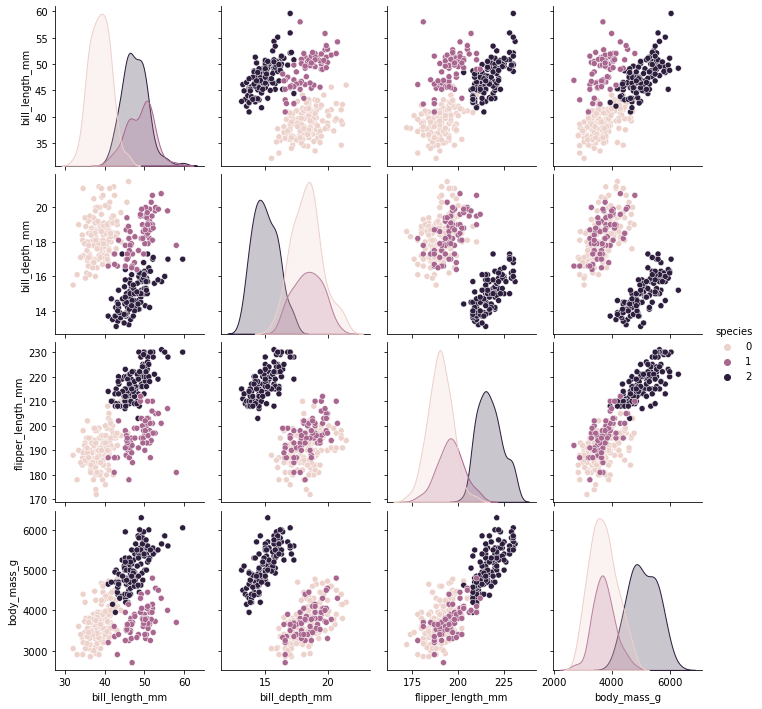

In [10]:
sns.pairplot(data=data.drop(['island','year','sex'],axis=1), hue='species')
plt.show()